# EDA (Exploratory Data Analysis): 

This is a basic exploratory data analysis for categorical and numerical variables. It has been tested for these datasets:
- **sklearn.iris**: numerical features, categorical target.
- **sklearn.titanic**: numerical and categorical features, numerical target (nominal).
- **sklearn.boston**: numerical features, numerical target.
- **weather**: my dataset with numerical and categorical data without target.

In [1]:
%matplotlib inline
import os
import sys  
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import reader
sys.path.append('../../scripts/tools')  
from reader import csv2df as reader

### arguments

In [2]:
starget = ''
ddt ={'lcol':['datetime'],'sformat':"%Y-%m-%d %H:%M:%S"}

## DATA

### import scikit-learn datasets 

### read data

### read timeseries dataset

In [3]:
## read data
path = os.path.join('../../datasets','dataset.weather.csv')
dfdata,dcol = reader(path,ddt=ddt)
dfdata = dfdata.set_index('datetime')
## collect temporal components
dfdata['year'] = [i.year for i in dfdata.index.tolist()]
dfdata['month'] = [i.month for i in dfdata.index.tolist()]
dfdata['day'] = [i.day for i in dfdata.index.tolist()]
dfdata['hour'] = [i.hour for i in dfdata.index.tolist()]
dfdata['dow'] = [int(i.strftime("%w")) for i in dfdata.index.tolist()]
dfdata['doy'] = [int(i.strftime("%j")) for i in dfdata.index.tolist()]
dcol['lc_cat'] = dcol['lc_cat'] + ['year','month','day','hour','dow','doy']

### data preparation

In [4]:
## object to categorical
for scol in dcol['lc_cat']:
    dfdata[scol] = dfdata[scol].astype('category')
## num int to categorical
#import copy
#dcol['lc_cat'] = copy.deepcopy(dcol['lc_int']) + ['DoY']
#dcol['lc_int'] = list()    

In [5]:
# available variables
print('Column names:')
print('- target(%s): %s'%(len(dcol['ly']),dcol['ly']))
print('- features(%s): %s'%(len(dcol['lx']),dcol['lx']))
print('- float(%s): %s'%(len(dcol['lc_float']),dcol['lc_float']))
print('- int(%s): %s'%(len(dcol['lc_int']),dcol['lc_int']))
print('- cat(%s): %s'%(len(dcol['lc_cat']),dcol['lc_cat']))

Column names:
- target(1): ['']
- features(13): ['RH (%)', 'WD', 'WS (m/s)', 'cloud_coverage', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)']
- float(11): ['RH (%)', 'WS (m/s)', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)']
- int(0): []
- cat(8): ['WD', 'cloud_coverage', 'year', 'month', 'day', 'hour', 'dow', 'doy']


## BASIC STATISTICS

In [6]:
## display tables with basic stastistics 
def dfdescribe(df:'dataframe'):
    """
    Display tables with basic stastistics for categorical and numeracila data.
    df -- df of data.
    """
    from IPython.display import display, HTML
    import pandas as pd

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object','category']).columns.values)
    
    # header
    display(HTML('<h1>BASIC STATISTICS:</h1>'))
    display(HTML(df.info()))
    ## basic statistics: numerical data
    display(HTML('<h2>Numerical Data</h2>'))
    display(HTML(pd.concat([df.describe().transpose(),
            pd.DataFrame(df.isnull().sum(),columns=['nnull']),
            pd.DataFrame(df.dtypes,columns=['dtypes'])],axis=1).dropna().to_html())) 
    # if there are categorical variables
    if len(lcol_cat)>0:    
        ## basic statistics: categorical variables
        display(HTML('<h2>Categorical Data</h2>'))
        display(HTML(pd.concat([df.describe(include=['O', 'category']).transpose(),
                pd.DataFrame(df.isnull().sum(),columns=['nnull']),
                pd.DataFrame(df.dtypes,columns=['dtypes'])],axis=1).dropna().to_html()))
        # frequencies
        for icol in lcol_cat:
            display(HTML('<h3>- Categorical Variable: "%s"</h3>'%icol))
            display(HTML(pd.concat([pd.DataFrame(df[icol].value_counts()).rename(columns={icol:'%s(%s)'%(icol,'num')}),  
                      pd.DataFrame(df[icol].value_counts()*100./float(len(df))).rename(columns={icol:'%s(%s)'%(icol,'%')})],axis=1).sort_values(['%s(%s)'%(icol,'%')], ascending=[0]).head(10).to_html()))
        ## basic statistics: categorical vs numerical variables
        if len(lcol_cat)>1 and len(lcol_num):
            display(HTML('<h2>Categorical vs Numerical Variables</h2>'))
            for scol_cat in lcol_cat:
                for scol_num in lcol_num:
                    dfgrouped = df.groupby(scol_cat)[scol_num].describe().sort_values(['count'], ascending=[0]).dropna()
                    if len(dfgrouped)>0:
                        display(HTML('<h3>- [Cat.: "%s"] vs [Num.: "%s"]</h3>'%(scol_cat,scol_num)))
                        display(HTML(dfgrouped.sort_index().head(10).to_html()))  
    ## basic statistics: correlation matrix (between num. variables)
    display(HTML('<h2>Matrix Correlation (for Num. Variables)</h2>'))
    display(HTML(df.corr().to_html()))
    # return
    return None

In [7]:
dfdescribe(dfdata)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 19 columns):
RH (%)                      17530 non-null float64
WD                          17533 non-null category
WS (m/s)                    17533 non-null float64
cloud_coverage              5117 non-null category
dew_point (degC)            17530 non-null float64
irradiation (MJ/m2)         10364 non-null float64
local_press (hPa)           17544 non-null float64
precipitation (mm)          3417 non-null float64
sea-level pressure (hPa)    17544 non-null float64
sunlight_duration (h)       9570 non-null float64
temperature (degC)          17544 non-null float64
vapor_press (hPa)           17530 non-null float64
visibility (km)             5117 non-null float64
year                        17544 non-null category
month                       17544 non-null category
day                         17544 non-null category
hour                        17544 non-n

<IPython.core.display.HTML object>

## TIMESERIES

In [26]:
## display charts and tables with basic visualization and statistics for time series
def dftimeserie(df:'dataframe'):
    """
    Display charts and tables with basic visualization and statistics for time series.
    df -- df of data.
    """
    from IPython.display import display, HTML
    
    # header
    display(HTML('<h1>TIMESERIES:</h1>'))
    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    for scol in lcol_num:
        # display 
        display(HTML('<h2>Timeserie: %s</h2>'%scol))
        # plot original timeseries
        import matplotlib.pyplot as plt
        dfdata[scol].plot(subplots=True,figsize=(15,3),title='%s: original'%scol)
        plt.show()
        for ires,sres in zip(['d','W','m','Y'],['daily','weekly','monthly','yearly']):
            # plot yearly time series
            import matplotlib.pyplot as plt
            dfdata[scol].resample(ires).mean().plot(subplots=True,figsize=(15,3),title='%s: %s'%(scol,sres))
            plt.show()

        # aggregation
        for ires,sres in zip(['year','month','hour','dow'],['yearly','monthly','hourly','daily week']):
            dfgrouped = df.groupby(ires)[scol].agg({'sum':'sum','avg':'mean','std':'std','count':'count'}).sort_index()
            dfgrouped['std_rel'] = dfgrouped[['avg','std']].apply(lambda x: x[1]/x[0],axis=1)
            if len(dfgrouped)>0:
                # display table
                display(HTML('<h3>- %s: %s</h3>'%(scol,sres)))
                display(HTML(dfgrouped.sort_index().head(24).to_html()))  
                # display plot
                dfgrouped = dfdata.groupby(ires)[scol].agg({'sum':'sum','avg':'mean','std':'std','count':'count'}).sort_index()
                import matplotlib.pyplot as plt
                fig, ax = plt.subplots(figsize=(6,3))
                dfgrouped[['avg']].plot(ax=ax,title=sres)
                llabels = dfgrouped.index.tolist()
                ax.set_xticks(list(range(len(llabels))))
                ax.set_xticklabels(llabels, rotation='horizontal',fontsize='small')
                plt.show()                
 

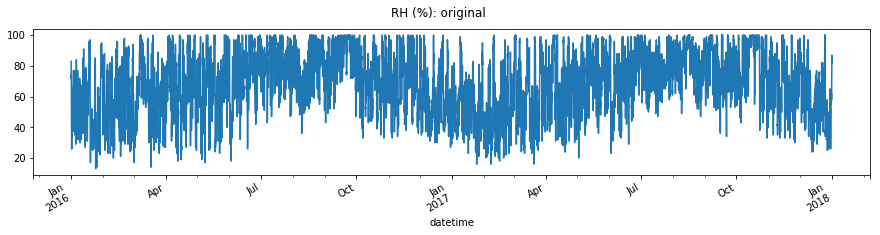

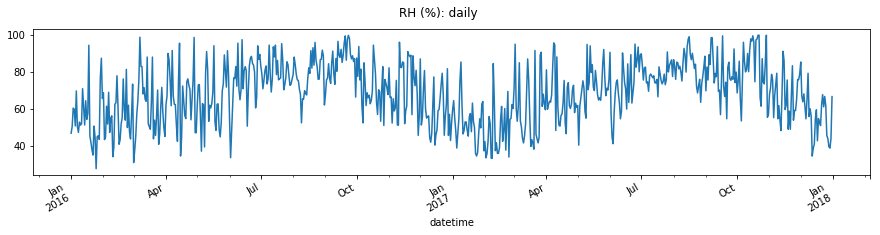

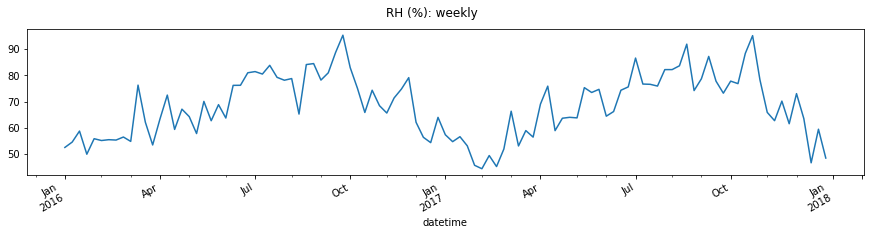

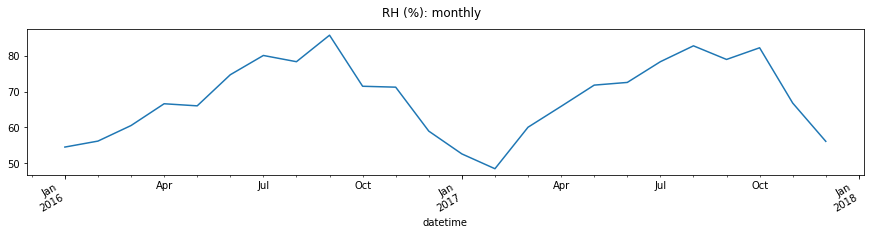

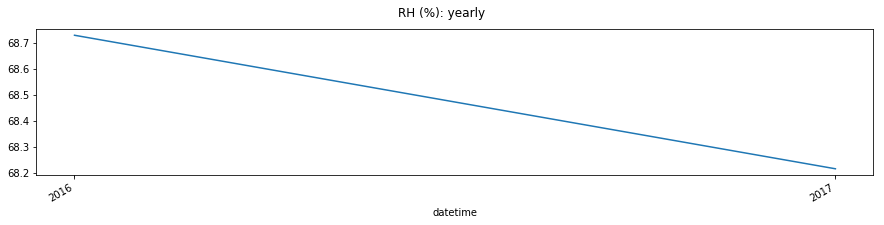

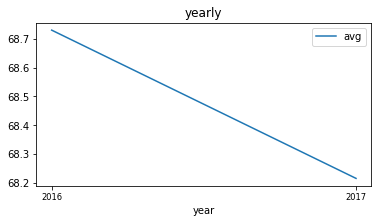

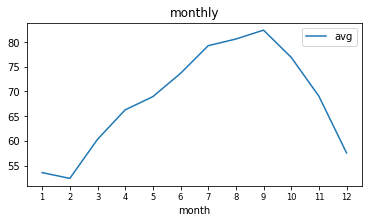

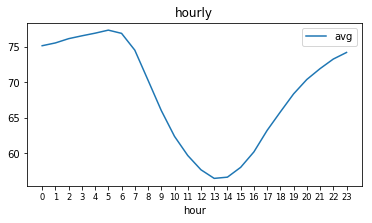

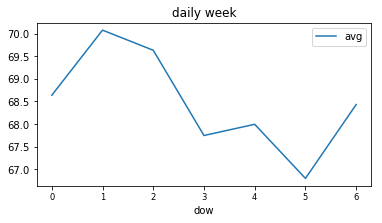

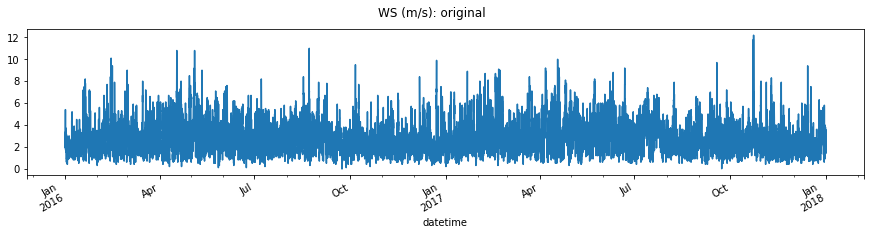

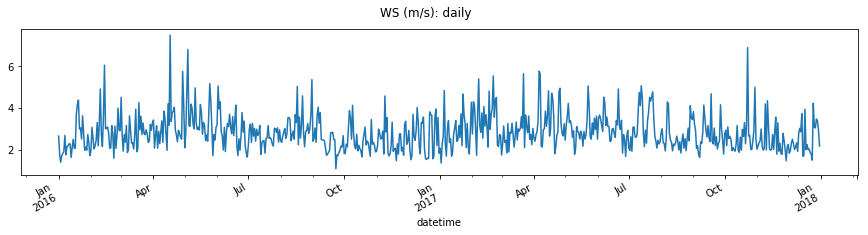

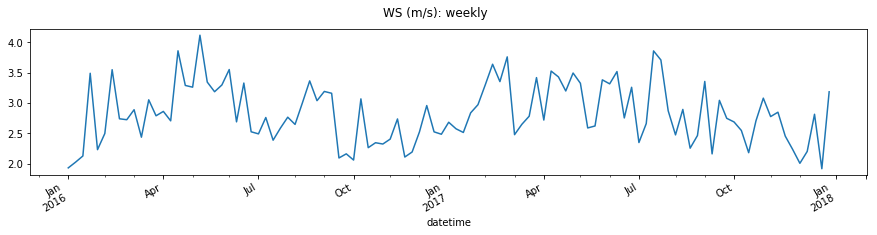

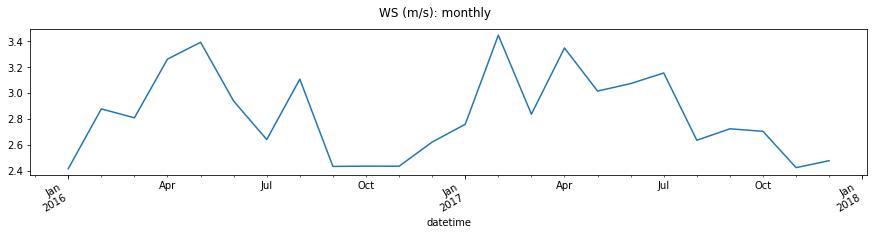

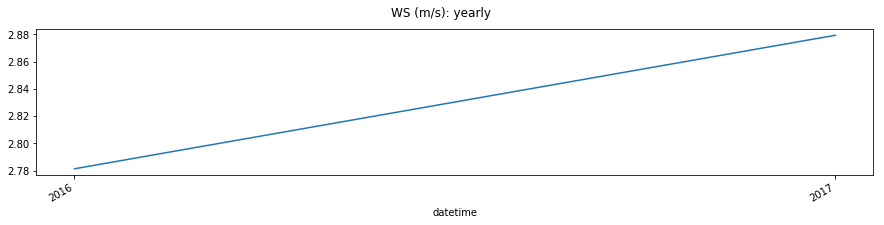

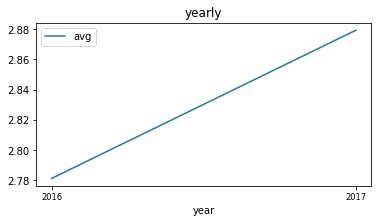

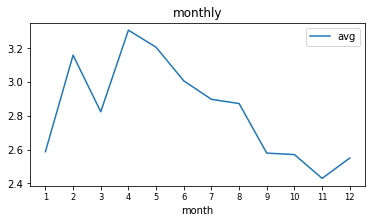

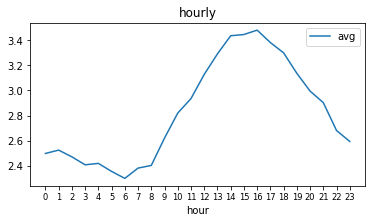

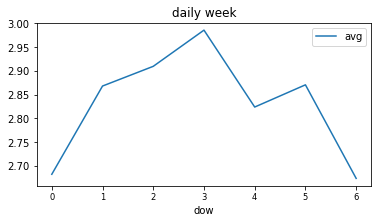

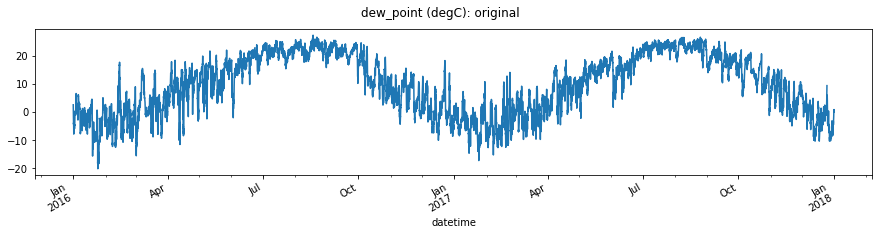

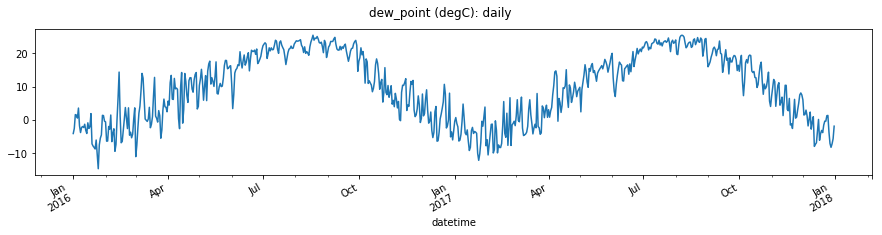

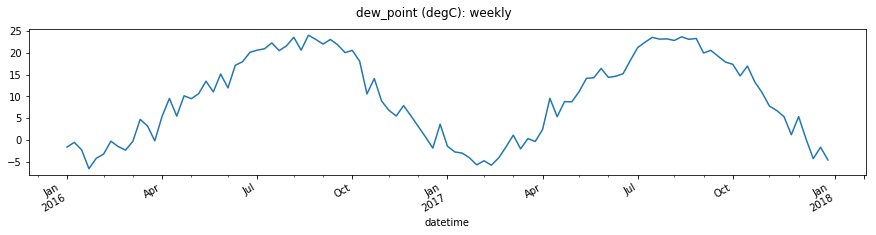

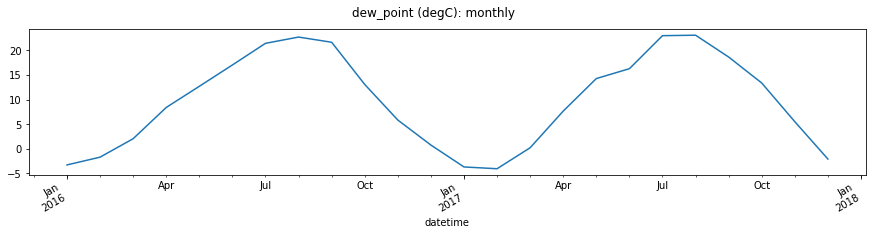

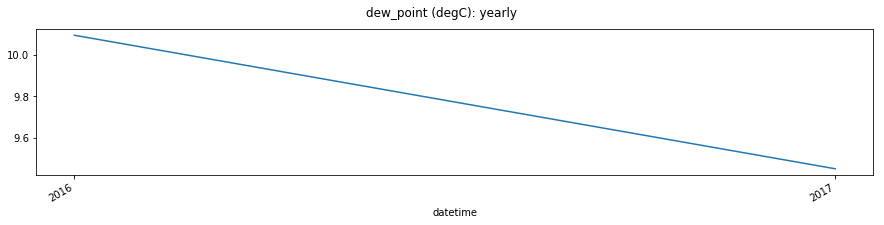

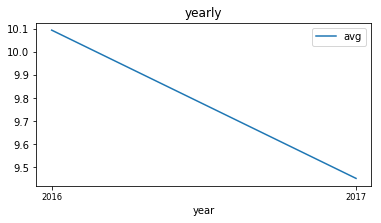

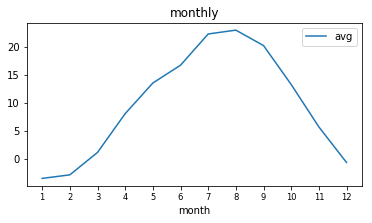

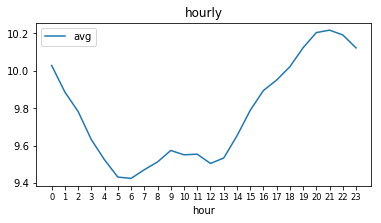

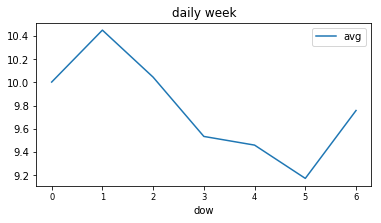

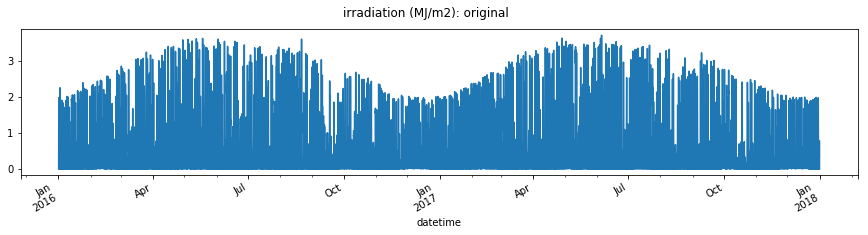

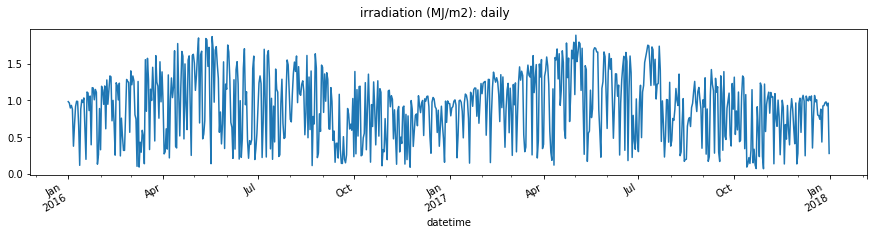

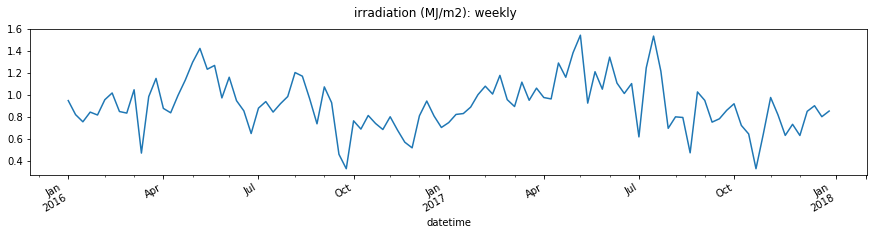

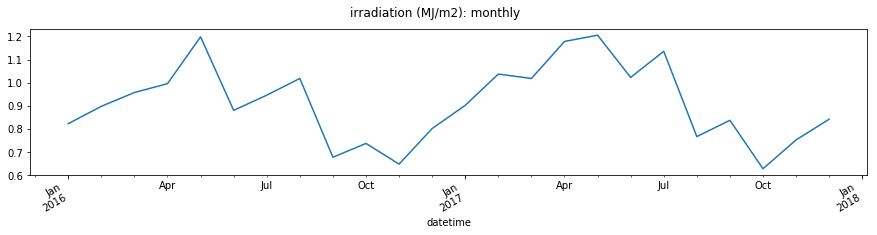

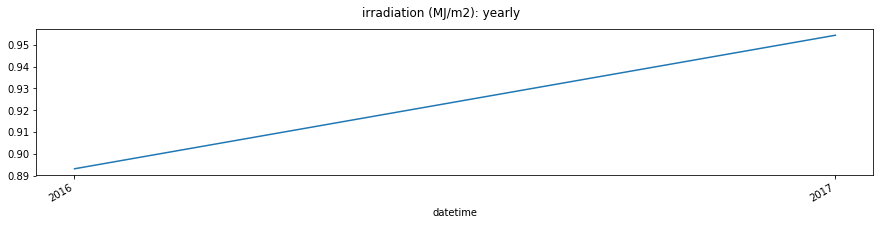

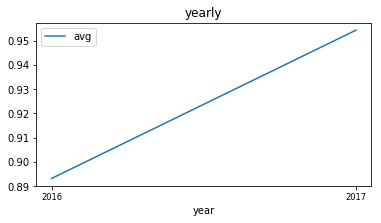

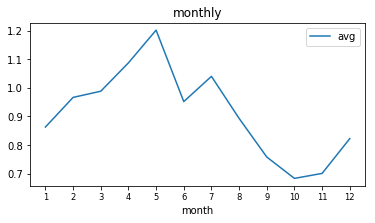

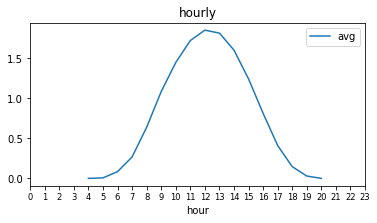

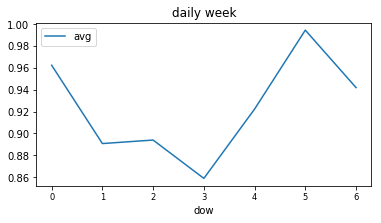

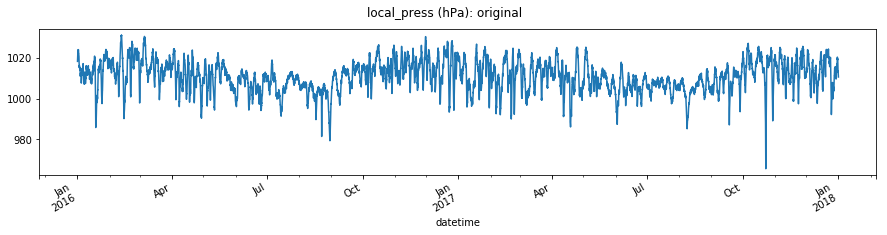

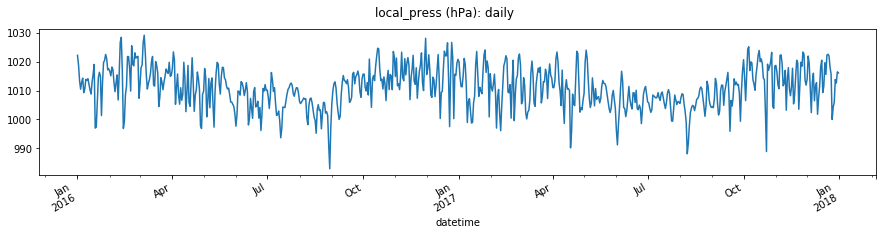

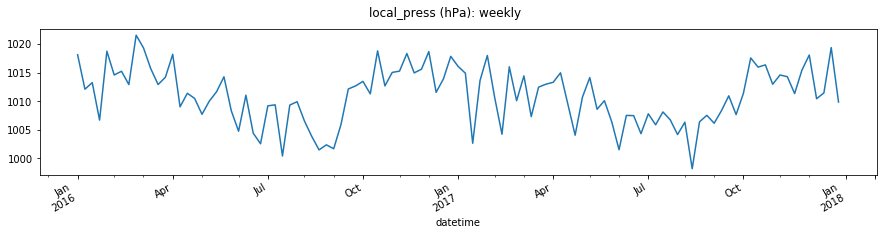

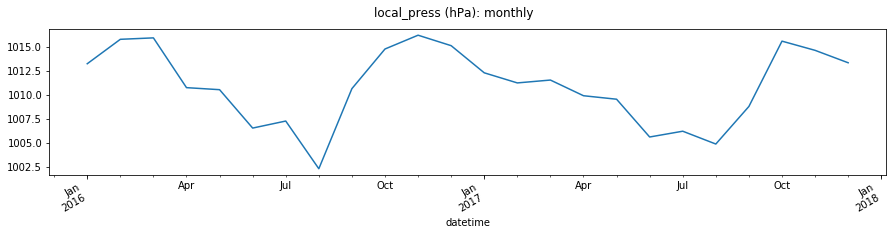

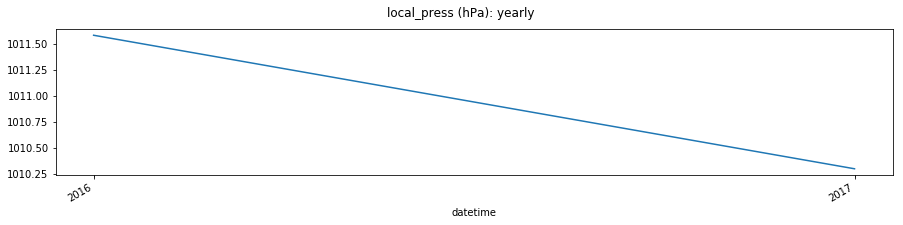

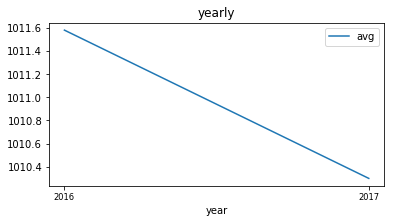

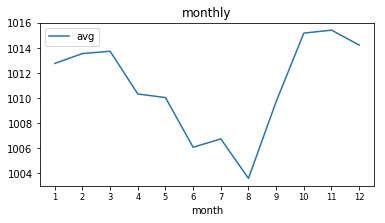

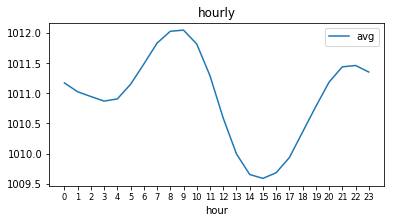

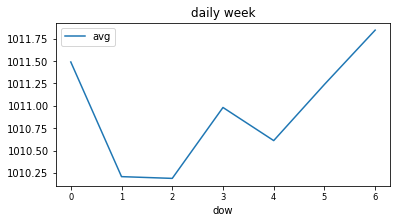

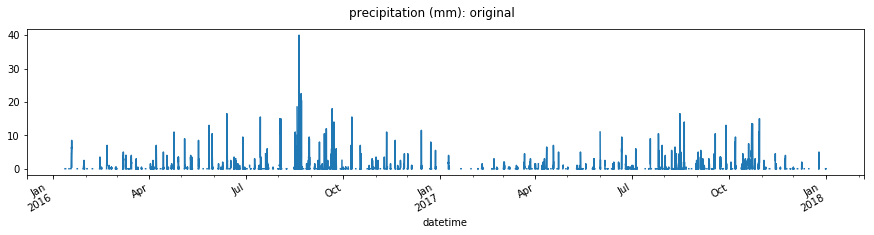

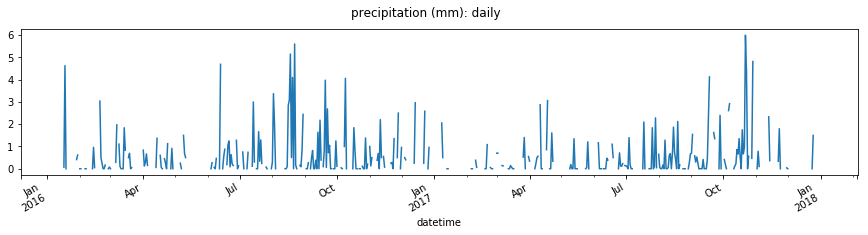

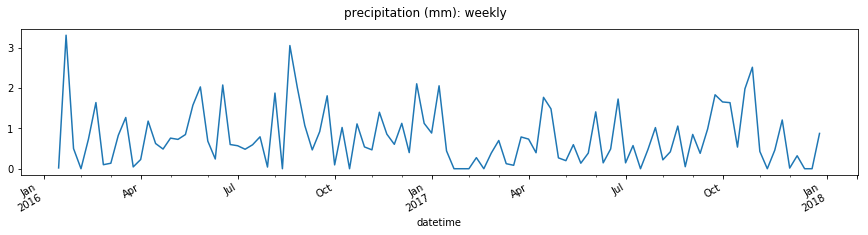

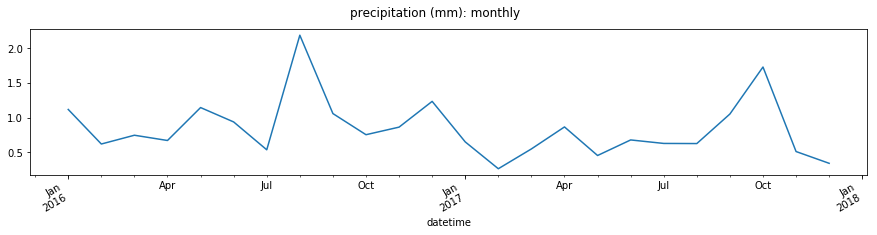

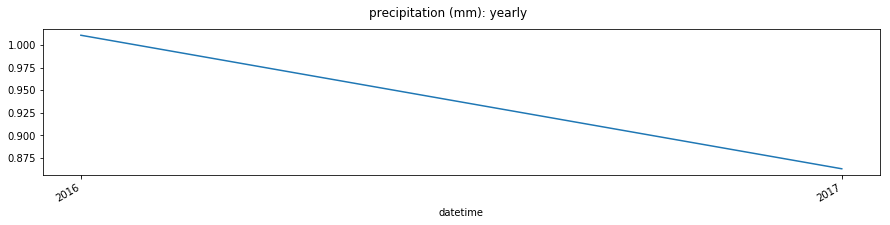

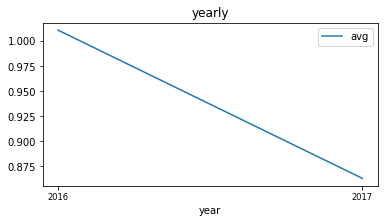

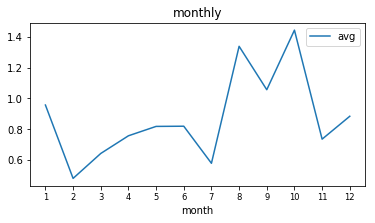

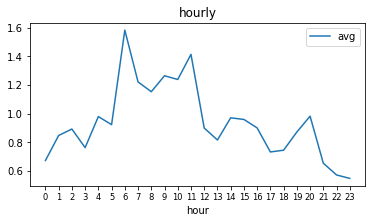

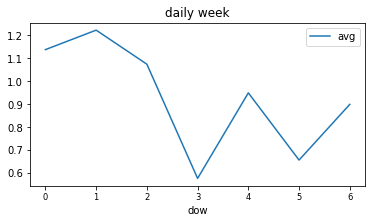

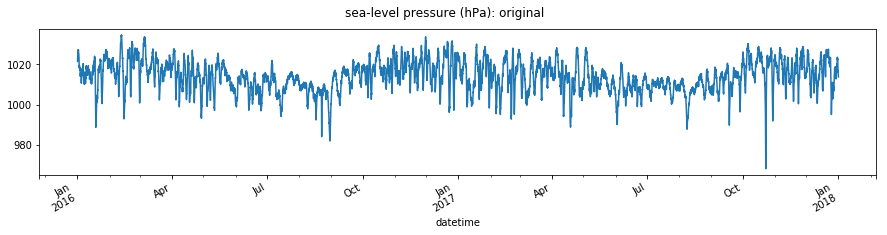

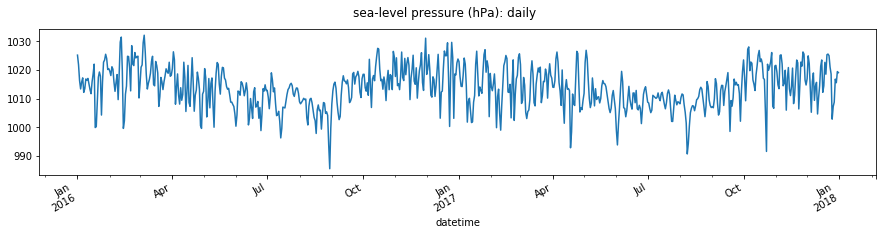

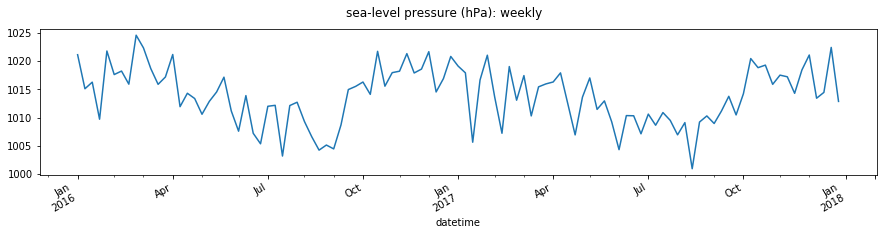

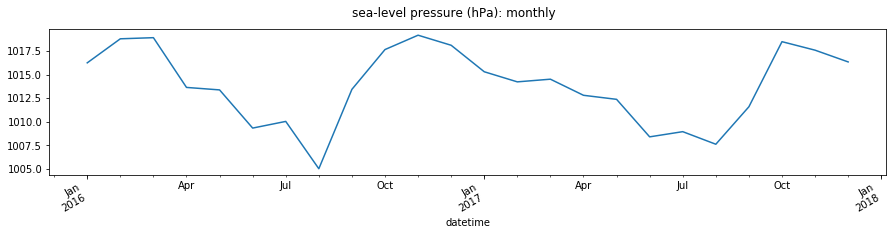

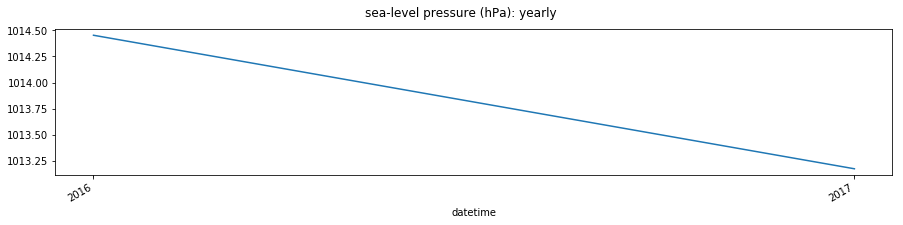

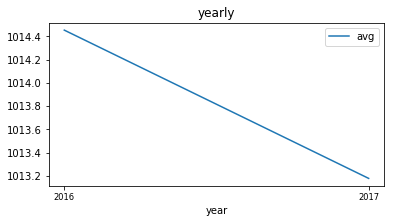

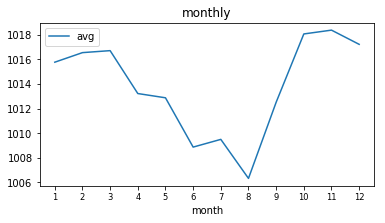

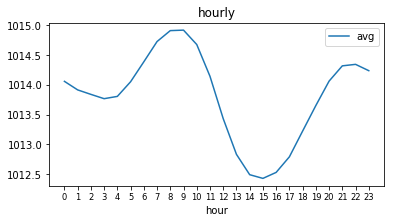

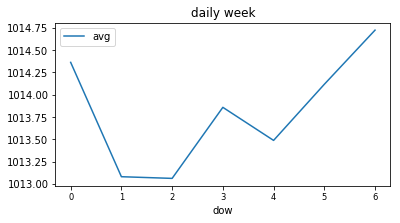

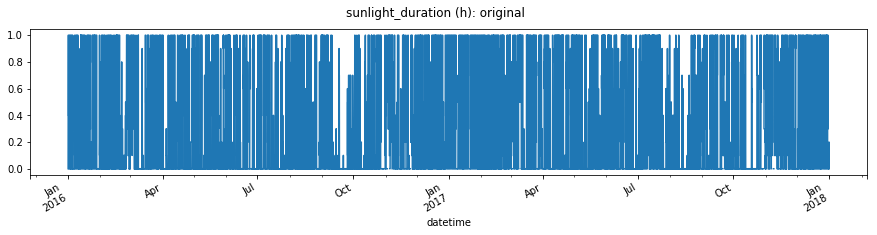

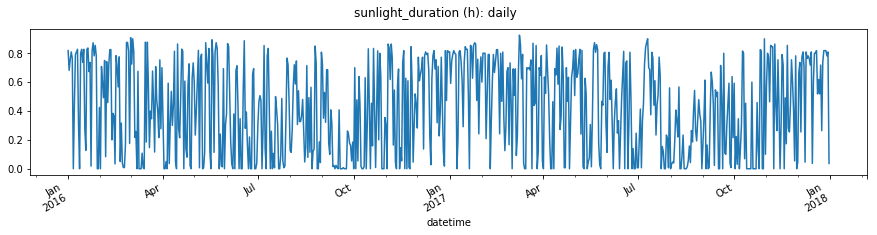

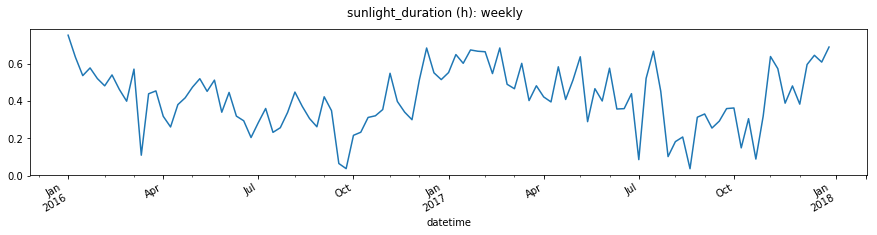

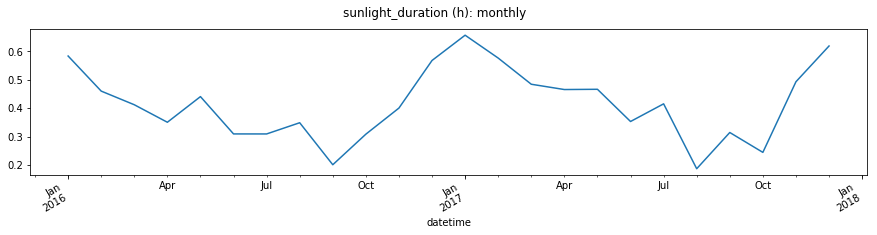

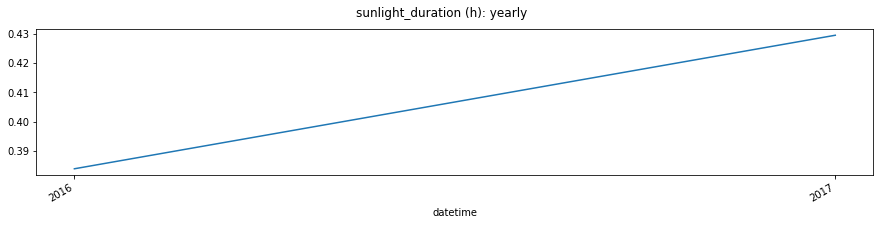

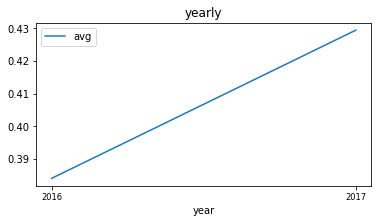

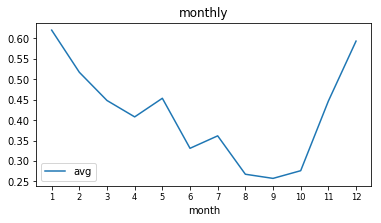

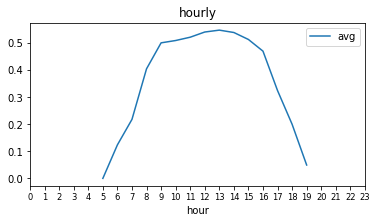

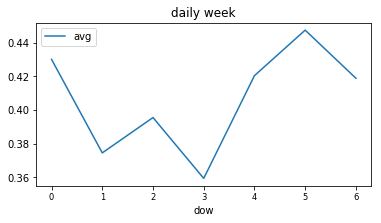

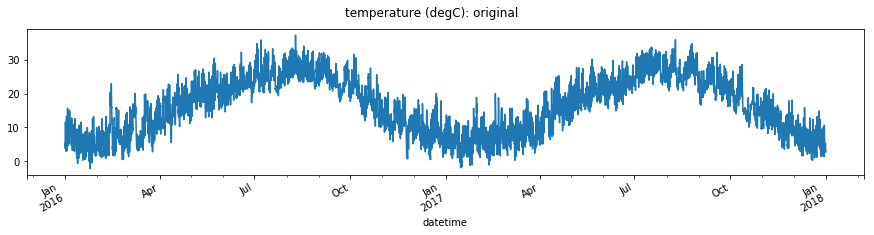

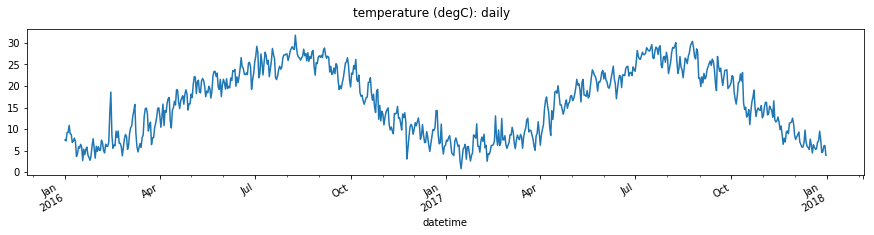

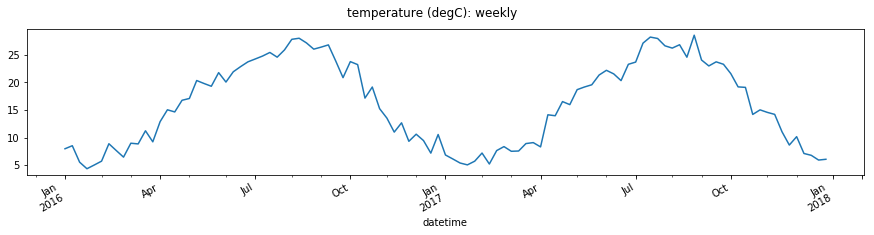

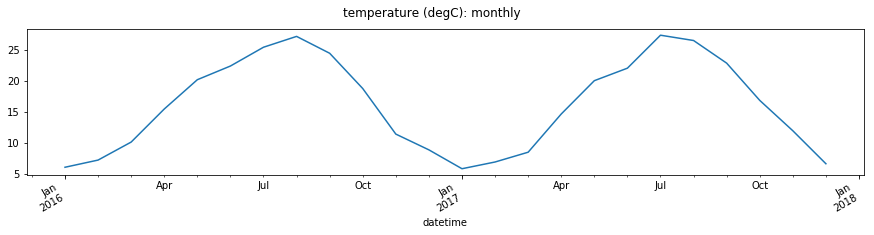

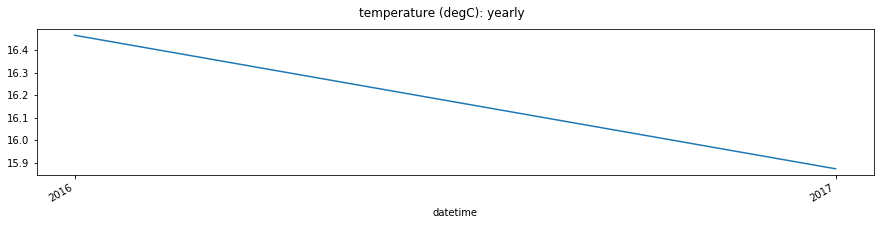

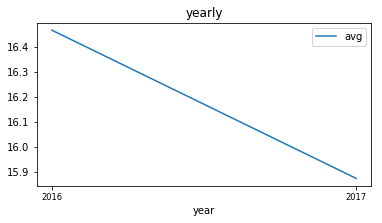

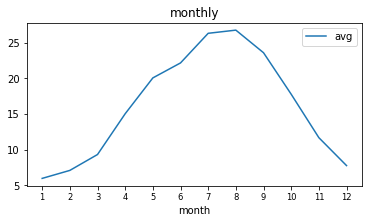

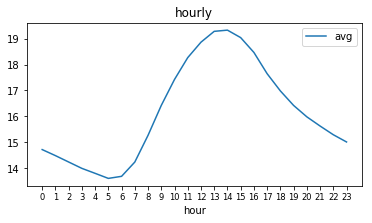

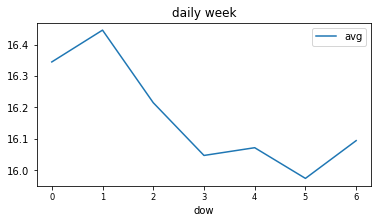

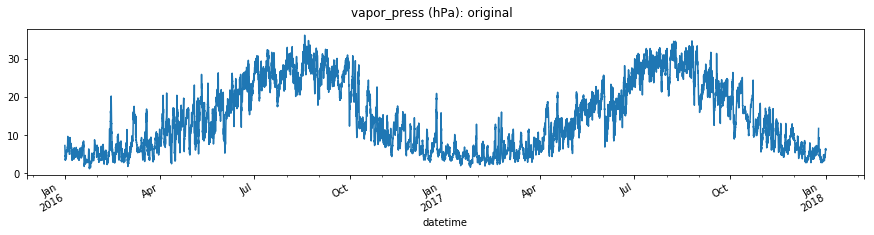

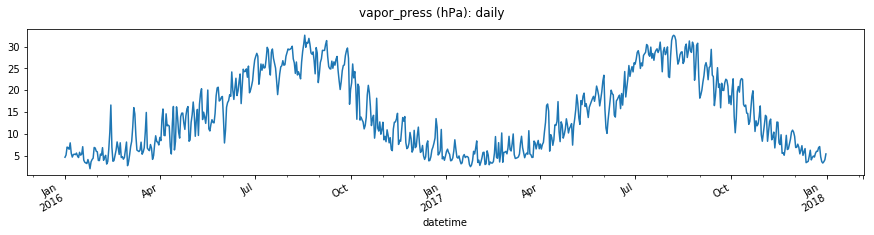

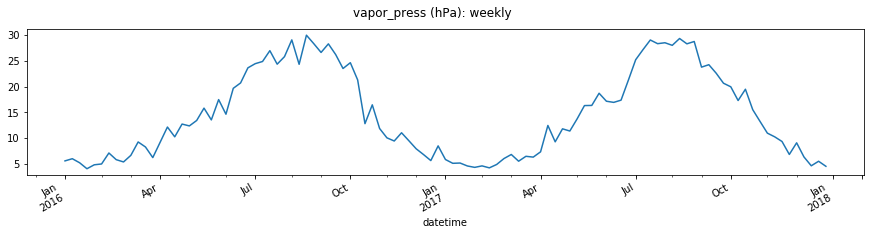

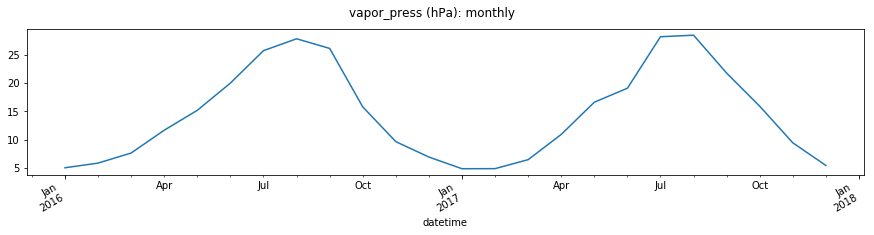

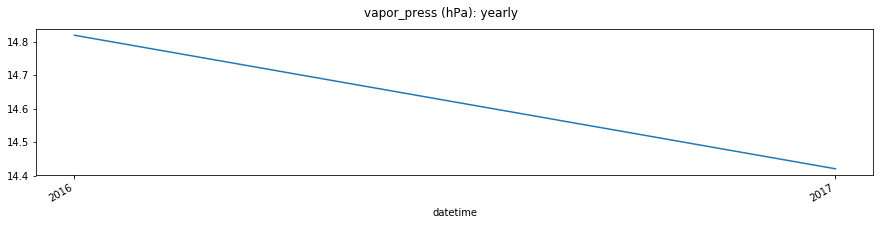

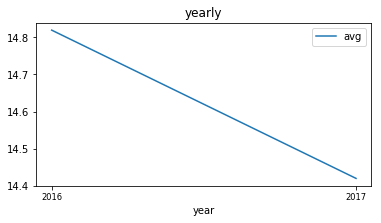

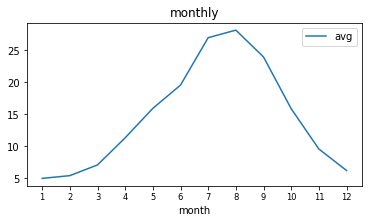

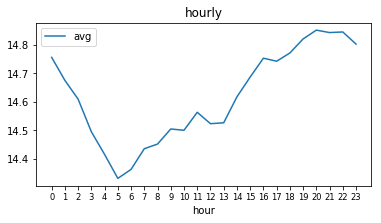

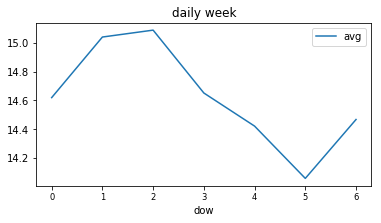

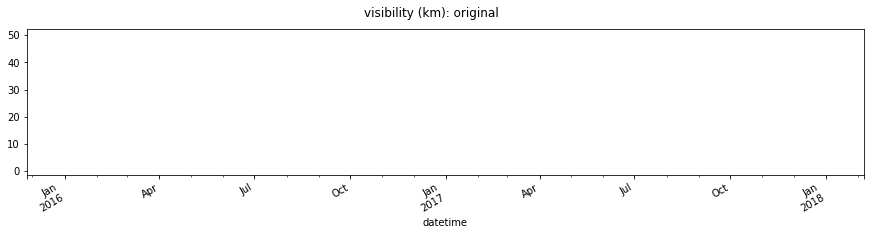

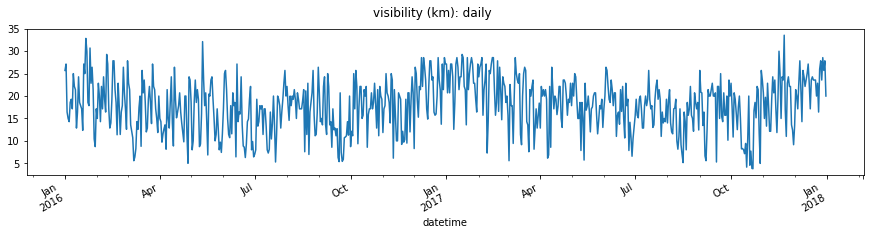

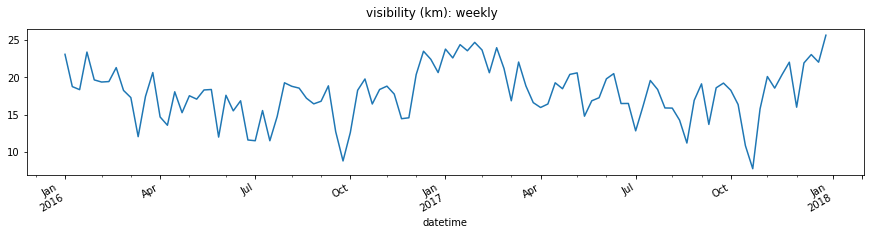

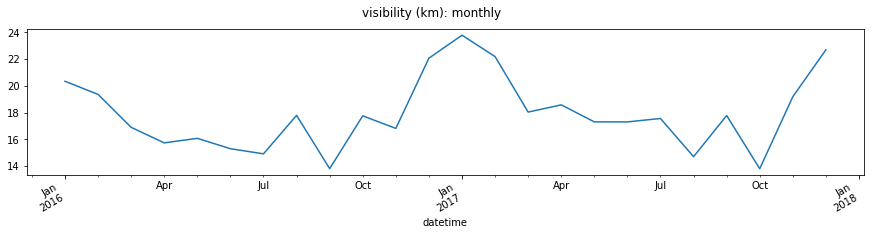

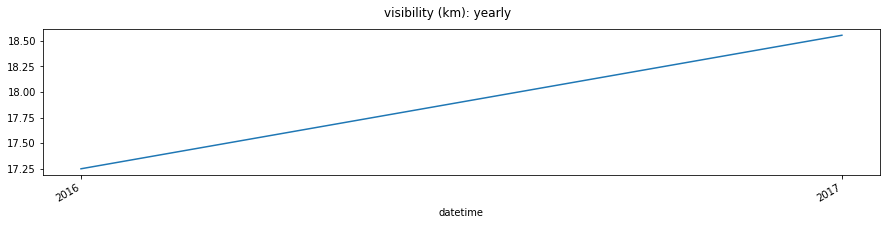

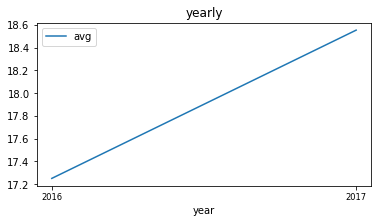

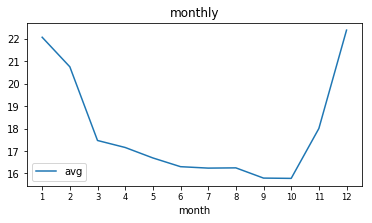

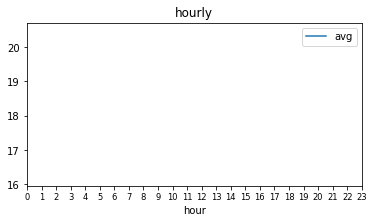

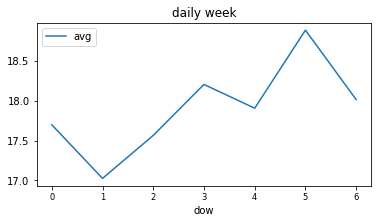

In [27]:
if len(ddt)>0 or not ddt is None:
    dftimeserie(dfdata)

## BOXPLOTS

In [80]:
## display boxplots
def dfboxplot(df:'dataframe')->dict:
    """
    Display boxplots for categorical and numeracila data.
    df -- df of data.
    return -- dictionary with possible outliers.
    """
    from IPython.display import display, HTML

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object','category']).columns.values)
    
    ## boxplot: numerical variables
    display(HTML('<h2>Boxplot: Numerical Data</h2>'))
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    _, bp = df[lcol_num].boxplot(rot=90,fontsize=12,grid=True,ax=ax,return_type='both')
    plt.show()
    # collect outlier
    doutliers = dict()
    loutliers = [flier.get_ydata() for flier in bp["fliers"]]
    for scol,outliers in zip(lcol_num,loutliers):
        if len(outliers)>0: 
            doutliers[scol] = outliers
            display(HTML('<b>Warning</b>: variable "%s" has %s possible outliers.'%(scol,len(outliers))))   
    # if there are categorical variables
    if len(lcol_cat)>0:    
        ## boxplot: categorical vs numerical variables      
        display(HTML('<h2>Boxplot: Categorical vs Numerical Data</h2>'))
        for scol_cat in lcol_cat:
            if len(df[scol_cat].unique())<=24:
                display(HTML('<h3>- Cat. Variable: "%s"</h3>'%(scol_cat)))
                import matplotlib.pyplot as plt
                fig, ax = plt.subplots(figsize=(10,10))
                df.boxplot(rot=90,fontsize=12,grid=True,ax=ax,by=scol_cat)
                plt.show()
                # close plot
                plt.cla()   # Clear axis
                plt.clf()   # Clear figure
                plt.close() # Close a figure window
    # return 
    return doutliers

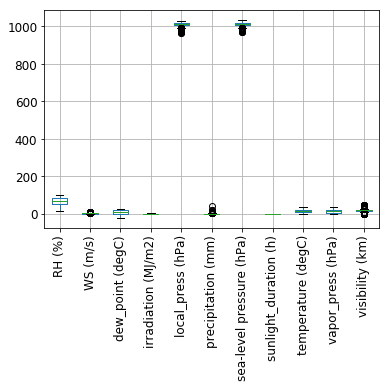

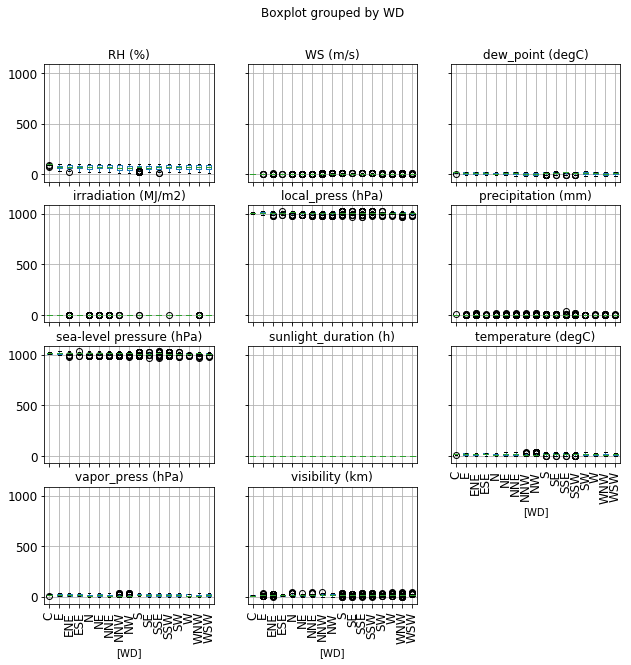

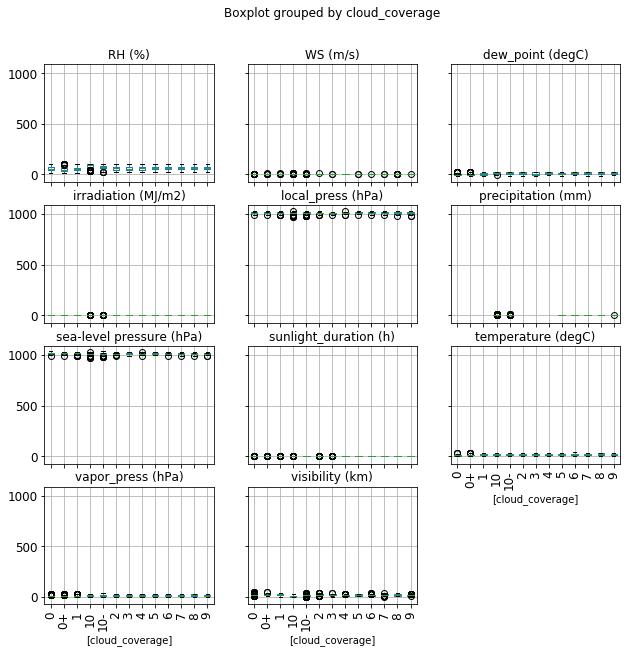

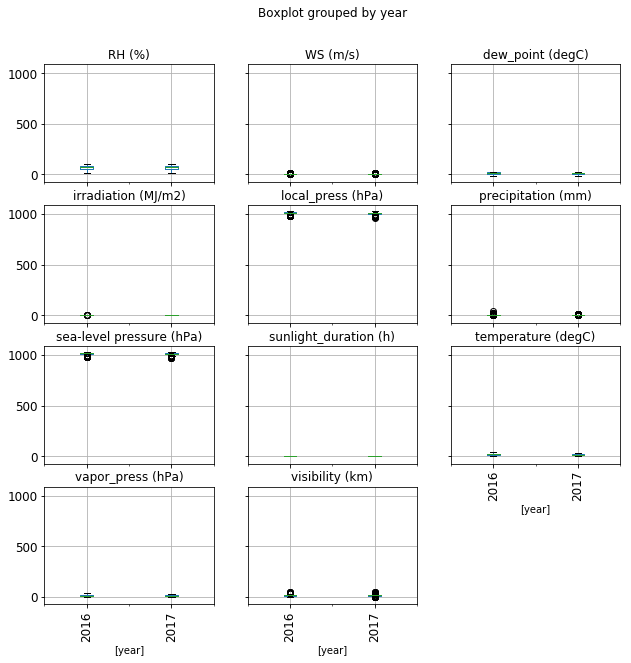

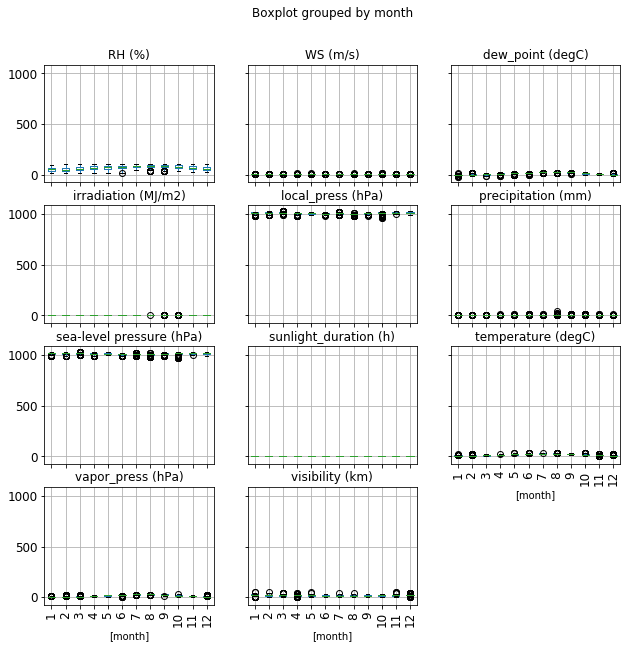

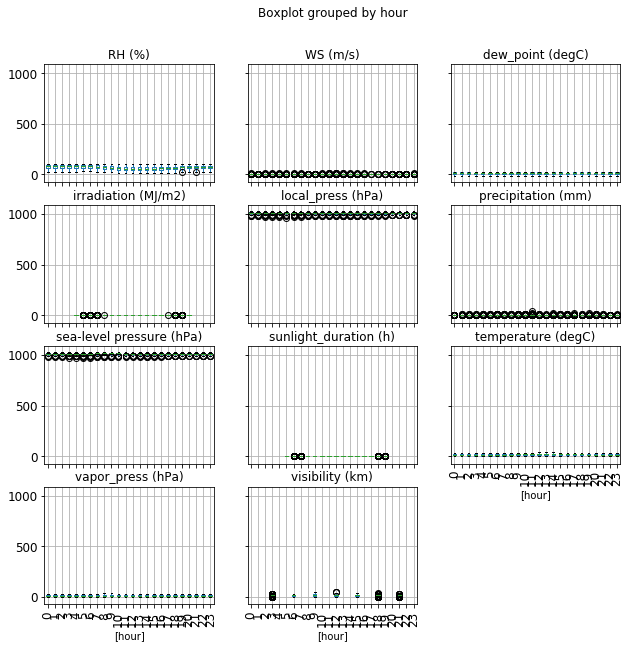

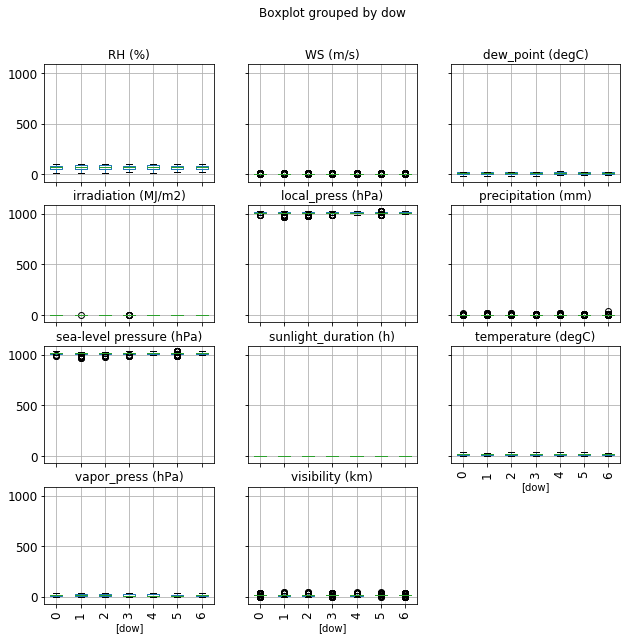

{'WS (m/s)': array([ 7.1,  6.5,  7.2,  6.5,  7.5,  8.2,  7.8,  6.6,  7.2,  6.5,  7.1,
         6.9,  6.6,  6.7,  7.2,  7.7,  6.6,  6.7,  6.5,  6.9,  8.4,  7.5,
         6.8,  7.6,  7.8,  7.9,  9.1,  7.5, 10.1,  8.8,  6.7,  7.2,  6.5,
         9.4,  7.9,  7.3,  7.1,  6.6,  9. ,  7.1,  7.7,  6.7,  7.5,  8. ,
         6.6,  6.4,  7.2,  6.4,  6.7,  6.6,  6.7,  6.7,  6.5,  7.1,  7. ,
         6.9,  6.5,  7.6,  7.1,  7.7, 10.8, 10. ,  9.8, 10.3, 10.1,  7.2,
         9.8,  8.8,  6.9,  7.1,  6.4,  6.6,  7. ,  6.7,  7.3,  7.9,  8. ,
         7.2,  7.3,  6.4,  7.6,  7.9,  8.5,  7.9,  6.9,  7.3,  6.6,  7.4,
         6.6,  7.6,  6.8,  6.7,  6.5,  6.4,  6.6,  6.7,  7.4,  6.8,  7.8,
         8.2,  7.3,  8.5,  6.4,  8.8,  8.6,  9.2,  8. ,  9. ,  7. ,  7.4,
         7.9,  7.5, 10.8,  7.2,  6.7,  7.5,  6.9,  6.7,  6.4,  6.4,  7.3,
         8.2,  7.3,  7.1,  6.7,  9. ,  6.9,  7.4,  7.3,  6.5,  7.1,  6.5,
         6.5,  6.9,  6.6,  6.8,  7.1,  7. ,  6.8,  7.5,  7. ,  7. ,  6.6,
         7.6,  6.9,  6.5, 

In [81]:
dfboxplot(dfdata)

## HISTOGRAMS

In [82]:
## display histograms
def dfhist(df:'dataframe'):
    """
    Display histograms for categorical and numeracila data.
    df -- df of data.
    """
    from IPython.display import display, HTML

    # list of columns per type
    lcol_num = list(df.select_dtypes(include=['float64','int64']).columns.values)
    lcol_cat = list(df.select_dtypes(include=['object','category']).columns.values)
    
    ## histogram: numerical variables
    display(HTML('<h2>Histogram: Numerical Data</h2>'))
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10,8))
    #df[lcol_num].hist(grid=True,ax=ax)
    df[lcol_num].plot.density(legend=True,ax=ax,subplots=True)
    plt.show()
    # if there are categorical variables
    if len(lcol_cat)>0:    
        ## pie chart: categorical variables
        display(HTML('<h2>Pie Chart: Categorical Data</h2>'))
        for scol_cat in lcol_cat:
            if len(df[scol_cat].unique())<=10:
                display(HTML('<h3>- Cat. Variable: "%s"</h3>'%(scol_cat)))
                import matplotlib.pyplot as plt
                fig, ax = plt.subplots(figsize=(6, 6))
                df[scol_cat].value_counts().plot.pie(autopct='%.2f', title='Count Labels(%)',fontsize=12)
                plt.show()
        ## histogram: categorical vs numerical variables      
        display(HTML('<h2>Histogram: Categorical vs Numerical Data</h2>'))
        for scol_cat in lcol_cat:
            for scol_num in lcol_num:
                if len(df[scol_cat].unique())<=10:
                    display(HTML('<h3>- [Cat.: "%s"] vs [Num.: "%s"]</h3>'%(scol_cat,scol_num)))
                    import matplotlib.pyplot as plt
                    fig, ax = plt.subplots(figsize=(10,5))
                    #df.groupby(scol_cat)[scol_num].plot(kind='hist',alpha=0.4,legend=True,ax=ax,density=True)
                    df.groupby(scol_cat)[scol_num].plot.density(legend=True,ax=ax)
                    plt.show()
                    # close plot
                    plt.cla()   # Clear axis
                    plt.clf()   # Clear figure
                    plt.close() # Close a figure window
    # return 
    return None

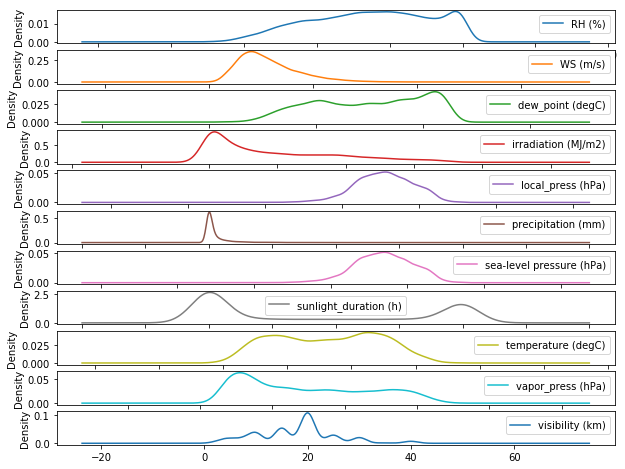

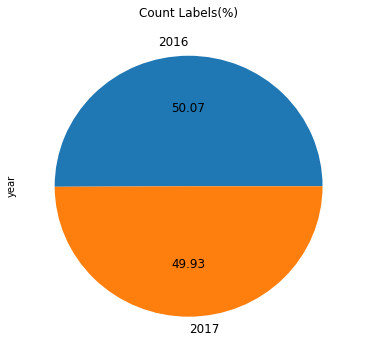

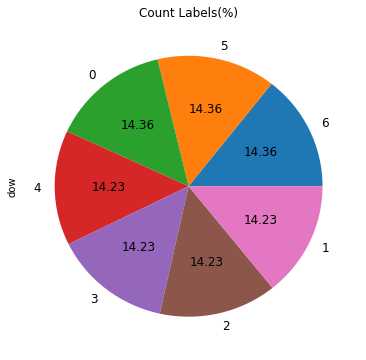

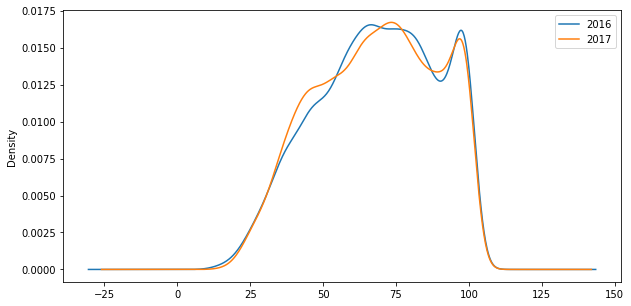

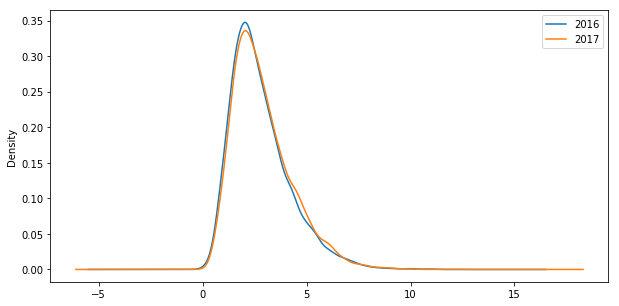

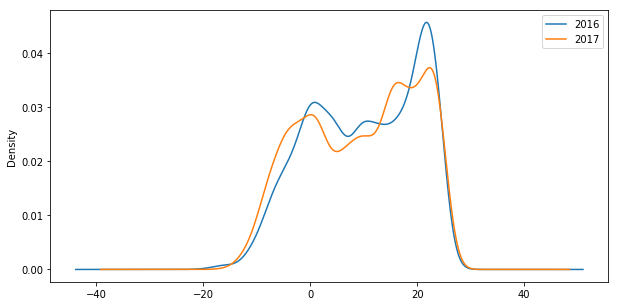

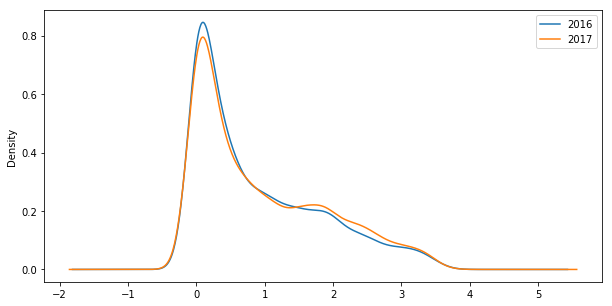

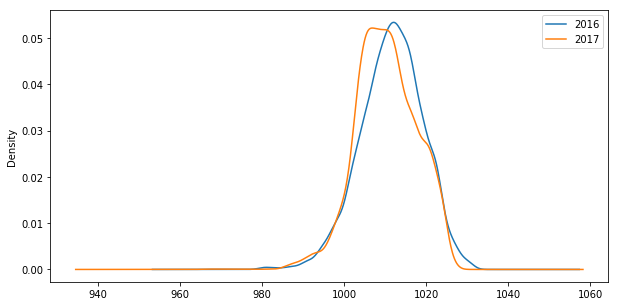

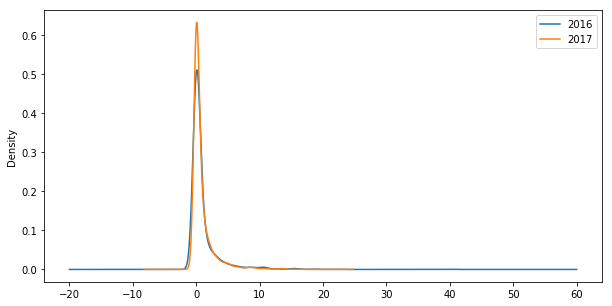

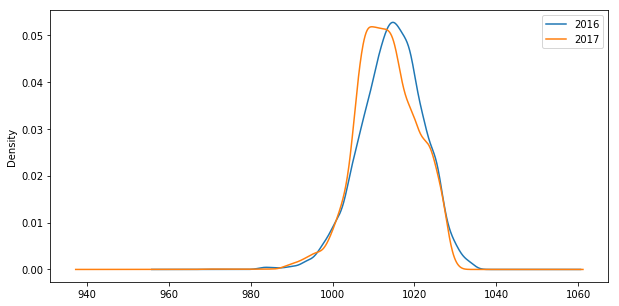

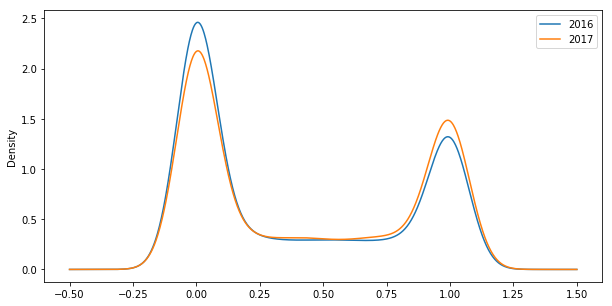

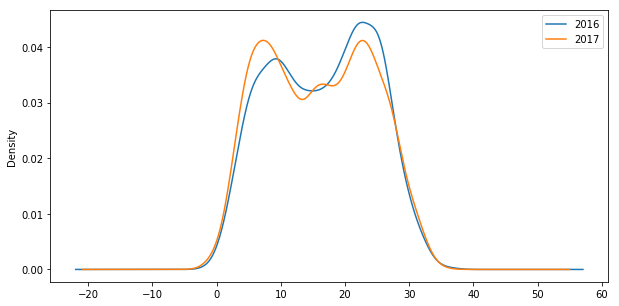

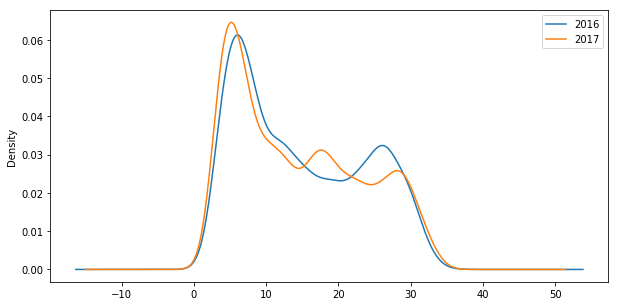

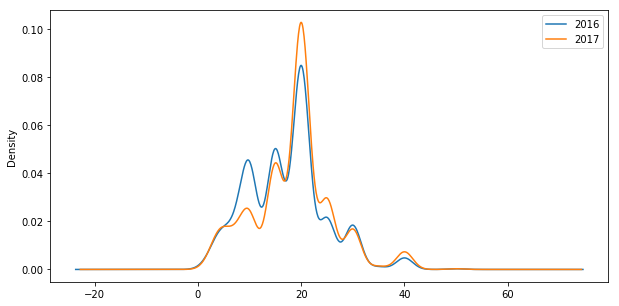

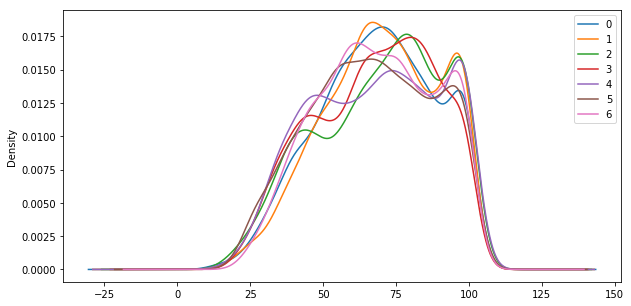

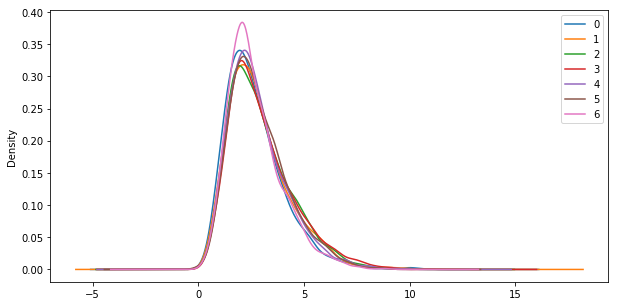

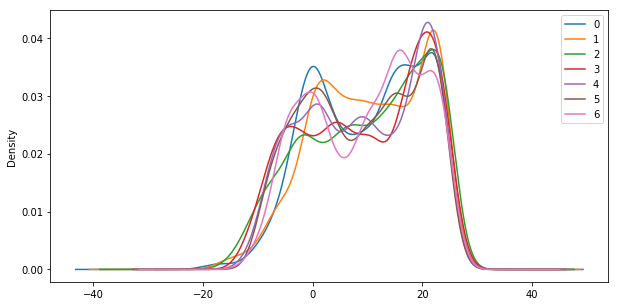

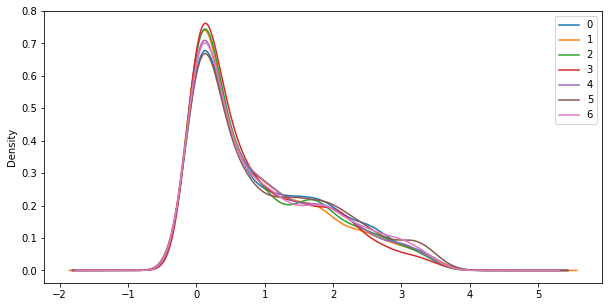

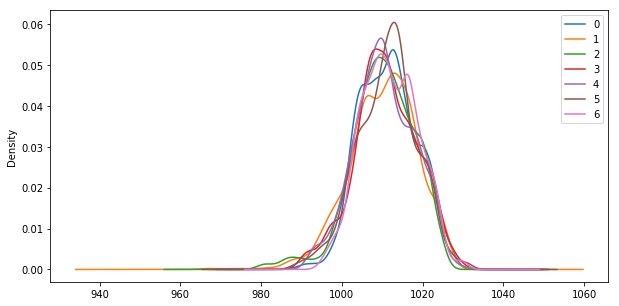

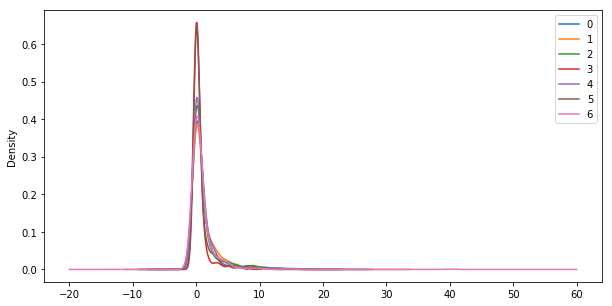

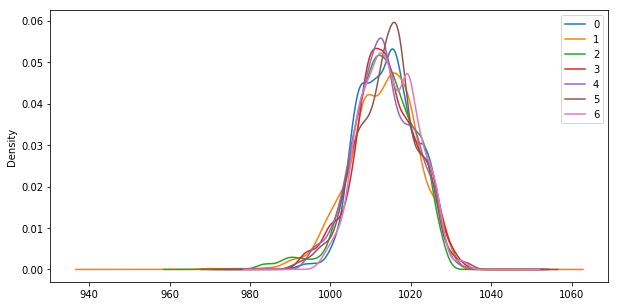

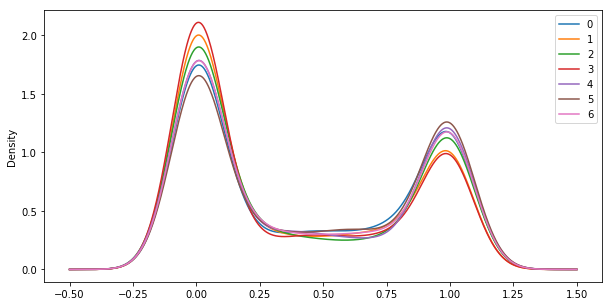

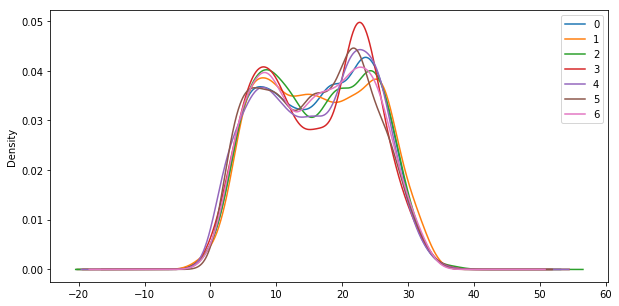

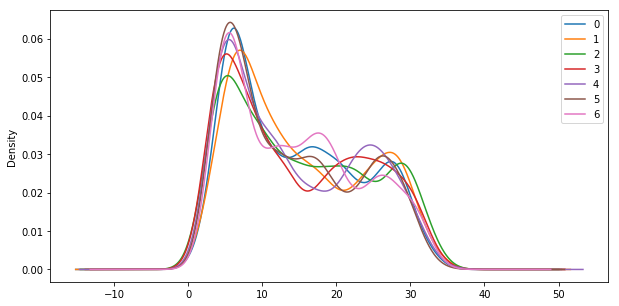

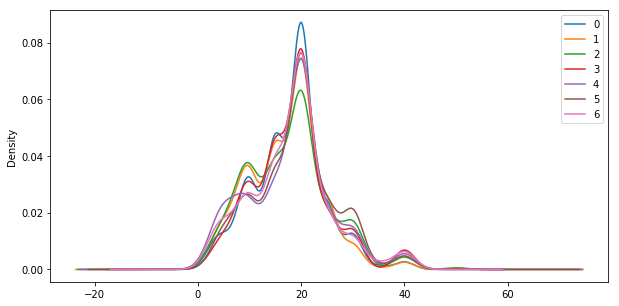

In [83]:
dfhist(dfdata)